# 0.) Import and Clean data

In [253]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [254]:
|from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

SyntaxError: ignored

In [255]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [256]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/bank-additional-full.csv", sep = ";")

In [257]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [258]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [259]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [260]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

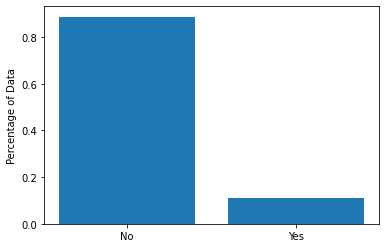

In [261]:
#visualization of yes vs no

obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [262]:
# Train Test Split
# 70/30 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [248]:
# the visualization above shows that the data is imbalanced
# a lof more NOs (~85%) than YES (~15%)

##oversampling the "YES" by randomly duplicating until it reaches the same size as the "NO" (majority class)


In [263]:
#using SMOTE to re-sample
from imblearn.over_sampling import SMOTE
     

  
oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)

#SMOTE
     

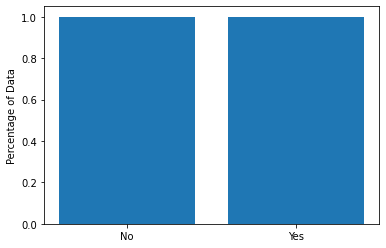

In [265]:
#resample data

obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train==0])/obs,len(y_train[y_train==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

ros = RandomOverSampler(random_state=42)




# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [266]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.215\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.499\ngini = 0.275\nsamples = 18626\nvalue = [15556, 3070]\nclass = No'),
 Text(0.125, 0.375, 'month_oct <= 3.6\ngini = 0.112\nsamples = 10397\nvalue = [9777, 620]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.095\nsamples = 10167\nvalue = [9657, 510]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 230\nvalue = [120, 110]\nclass = No'),
 Text(0.375, 0.375, 'contact_telephone <= 1.317\ngini = 0.418\nsamples = 8229\nvalue = [5779, 2450]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 5958\nvalue = [3580, 2378]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.061\nsamples = 2271\nvalue = [2199, 72]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.426\nsamples = 32534\nvalue = [10024, 22510]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.696\ngini = 0.347\nsamples = 26675\nvalue = [5964, 20711]\nclass = 

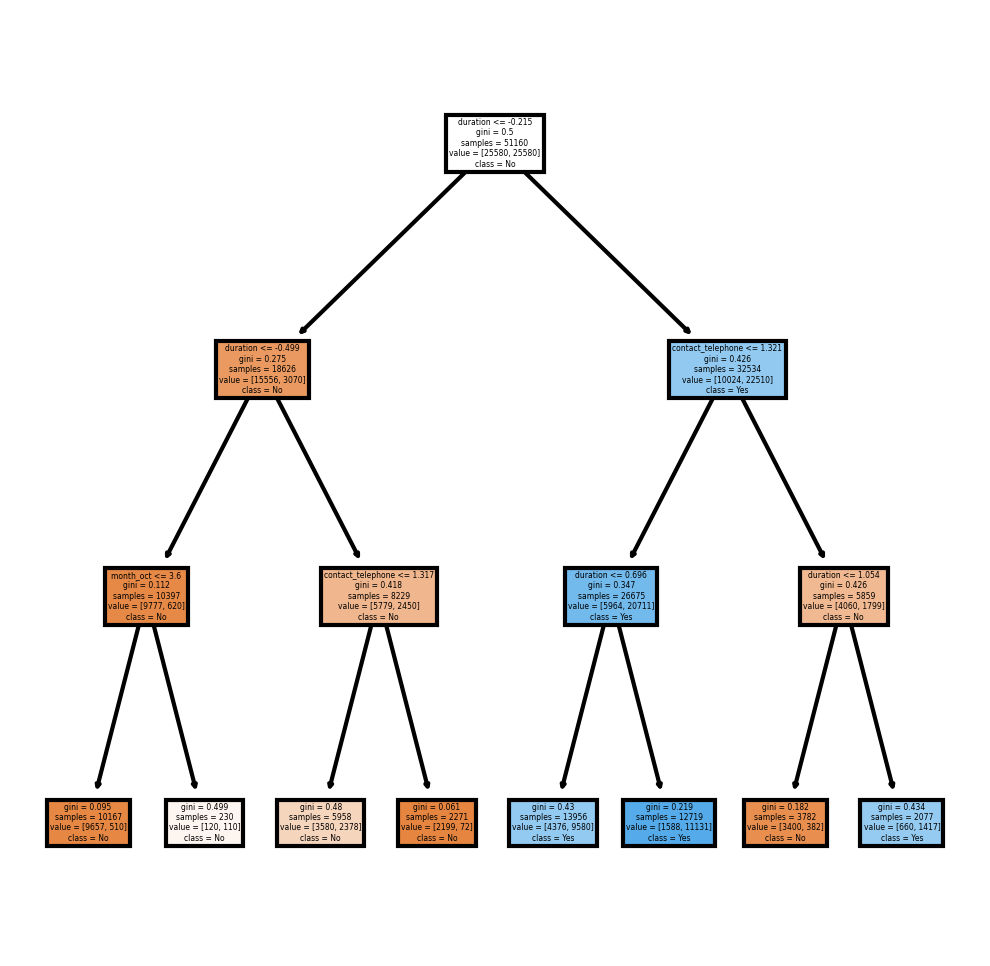

In [267]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [268]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

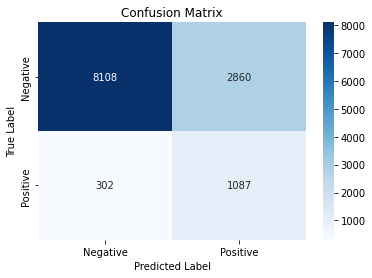

In [269]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [270]:
#fit decision tree and obtain confusion matrix

# 3.) Use bagging on your descision tree 

In [271]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7457311645221332


In [272]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

#confusion matrix for bagging

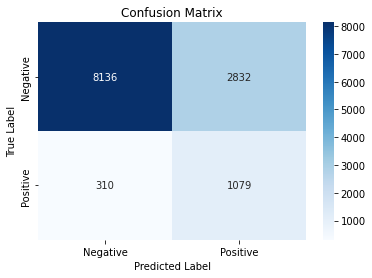

In [273]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [274]:
#bagging of decision tree is a bit better

# 4.) Boost your tree

In [275]:
from sklearn.ensemble import AdaBoostClassifier

In [276]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [277]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

#confusion matrix for boosted

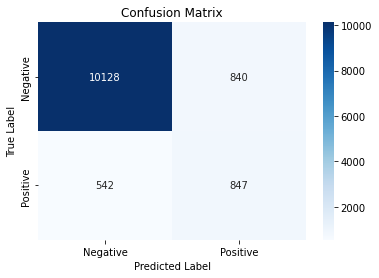

In [278]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [279]:
#pip install mlens

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####

#1)Logistic Regression
#2)Decision Tree Classifier
#3) Random Forest Classifier
#4) Support Vector Classifier
#5) K-Nearest Neighbors Classifier

from mlens.ensemble import SuperLearner



In [284]:
#from mlxtend.classifier import SuperLearner
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define base learners
base_learners = [LogisticRegression(),
                 DecisionTreeClassifier(),
                 RandomForestClassifier(),
                 SVC(),
                 KNeighborsClassifier()]



# Create SuperLearner object
super_learner = SuperLearner()


### FIT TO TRAINING DATA
super_learner = SuperLearner()

# Add base learners to SuperLearner object
super_learner.add(base_learners)

# Fit SuperLearner to training data
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)
base_predictions


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

array([[0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [287]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [289]:
y_pred = log_reg.predict(super_learner.predict(X_test))

In [290]:

log_reg.coef_

array([[ 9.73419334, -4.63145727, -4.28385954,  9.73419334, -2.85573887]])

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX

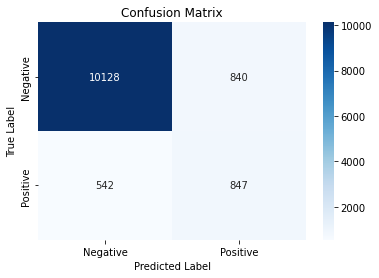

In [295]:
#matrix

cm_SUPER = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specifitices (Out of Sample)

In [307]:
def sens(cm):
  sens = cm[1][1]/(cm[1][1]+cm[0][1])
  return sens



In [308]:

def spec(cm):
  spec = cm[0][0]/(cm[0][0]+cm[1][0])
  return spec
     

In [309]:
sens_super = sens(cm_SUPER)
spec_super = spec(cm_SUPER)
sens_boost = sens(cm_boost)
spec_boost = spec(cm_boost)
sens_bag = sens(cm_bag)
spec_bag = spec(cm_bag)
sens_tree = sens(cm_raw)
spec_tree = spec(cm_raw)
sens_array = [sens_super, sens_boost, sens_bag, sens_tree]
spec_array = [spec_super, spec_boost, spec_bag, sens_tree]

<BarContainer object of 4 artists>

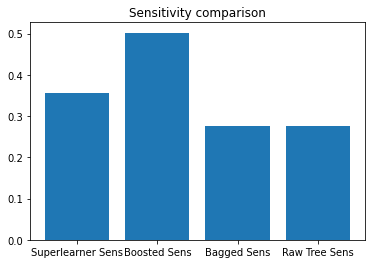

In [310]:
#comparing sensitivity

plt.title("Sensitivity comparison")
sens_bars = ("Superlearner Sens","Boosted Sens", "Bagged Sens", "Raw Tree Sens")
plt.bar(sens_bars, sens_array)


<BarContainer object of 4 artists>

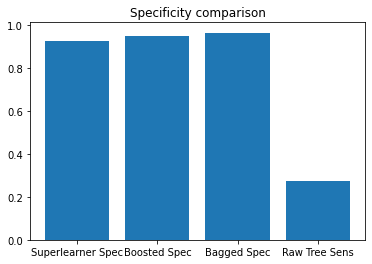

In [311]:
#comparing specificity

plt.title("Specificity comparison")
sens_bars = ("Superlearner Spec","Boosted Spec", "Bagged Spec", "Raw Tree Sens")
plt.bar(sens_bars, spec_array)
     